# GLCM

Algorithm theory: https://prism.ucalgary.ca/bitstream/handle/1880/51900/texture%20tutorial%20v%203_0%20180206.pdf?sequence=11&isAllowed=y

Next link contains an usage case of the library: https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_glcm.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.feature import greycomatrix, greycoprops
from skimage import data

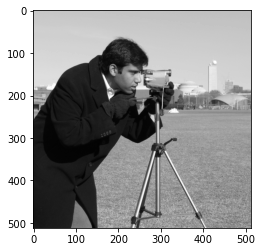

In [2]:
# Load the sample image
image = data.camera()
plt.imshow(image, cmap="gray");

First, we select a set of patches from the image. We select 4 grass patches and 4 sky patches, and we register them.
Next, there is the code we to select those patches manually and we save them in two independent lists.

Remember, that a patch is an image piece. In our case we have defined it as a square of $21 \times 21$ pixels.

In [3]:
PATCH_SIZE = 21

In [4]:
# select some patches from grassy areas of the image
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

In [5]:
# select some patches from sky areas of the image
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

Once we have the patches selected, we can compute the GLCM features.
The computation procedure of this kind of features consists in two steps:
1. Compute the Grey Level Co-occurrence Matrix (la GLCM).
2. Compute the texture properties of the GLCM.

The first step is achieved applying the function [greycomatrix](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.graycomatrix) and the second one using [greycoprops](https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.graycoprops).

In [6]:
# compute some GLCM properties each patch
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, 
                        distances=[5],
                        angles=[0], # We ignore this
                        levels=256, # Number of possible pixel values
                        symmetric=True, 
                        normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

In [7]:
glcm.shape

(256, 256, 1, 1)

In [8]:
xs

[6.044642857142856,
 11.973214285714285,
 18.794642857142858,
 18.80059523809523,
 0.46726190476190477,
 0.5744047619047619,
 0.5208333333333334,
 0.5386904761904763]

Next, we can visualise the selected patches and the computed features.

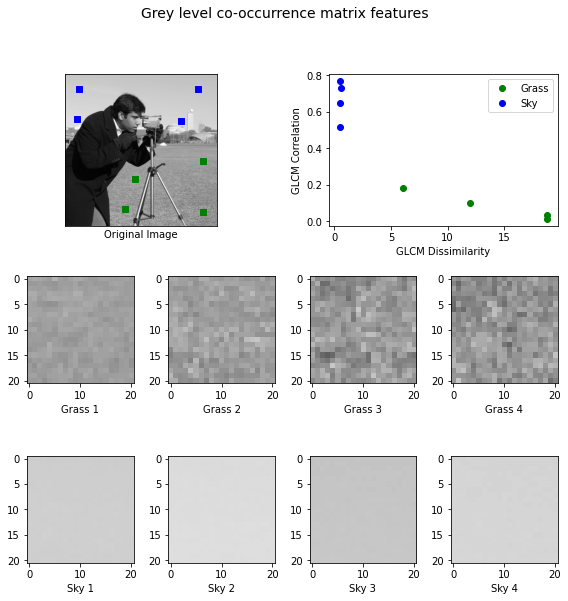

In [9]:
# create the figure
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')

for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')

ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go', label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo', label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))

# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()

## Download dataset

In [10]:
import fm.utils.mnist_reader as mnist_reader

In [11]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git fm

fatal: la ruta de destino 'fm' ya existe y no es un directorio vacío.


In [12]:
X_train, y_train = mnist_reader.load_mnist('fm/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fm/data/fashion', kind='t10k')

In [13]:
X_train.shape

(60000, 784)

In [14]:
image = X_train[0].reshape((28, 28))

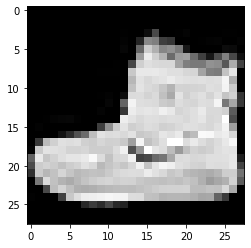

In [15]:
plt.imshow(image, cmap="gray")

## Feature extraction

In [16]:
PATCH_SIZE = int(28 / 4)
PATCH_SIZE

7

In [17]:
patches = []
for y in range(0, image.shape[0] - PATCH_SIZE + 1, PATCH_SIZE):
    for x in range(0, image.shape[1] - PATCH_SIZE + 1, PATCH_SIZE):
        patches.append(image[y:y + PATCH_SIZE, x:x + PATCH_SIZE])

In [18]:
patches[0].shape

(7, 7)

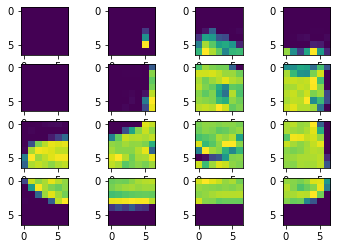

In [19]:
fig, axes = plt.subplots(4, 4)
axes = axes.flatten()

for i, patch in enumerate(patches):
    axes[i].imshow(patch)

plt.show()

In [20]:
# compute some GLCM properties each patch
xs = []
ys = []
for patch in patches:
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

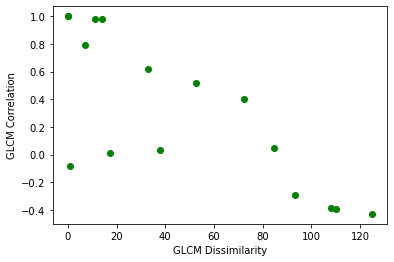

In [21]:
# for each patch, plot (dissimilarity, correlation)
plt.plot(xs[:len(patches)], ys[:len(patches)], 'go')
plt.xlabel('GLCM Dissimilarity')
plt.ylabel('GLCM Correlation')
plt.show()

In [22]:
PATCH_PER_IMAGE = int(28 / PATCH_SIZE) * int(28 / PATCH_SIZE)
PATCH_PER_IMAGE

16

## Tasks

Build your own classifier and extract metrics to know how the classifier is working.

Detect with which classes is the classifier working better and worse. Try to explain the reasons.


**HINT:** The confusion matrix can be very helpful.

Useful link: https://towardsdatascience.com/multi-class-classification-extracting-performance-metrics-from-the-confusion-matrix-b379b427a872


# Features library

https://github.com/explainingAI/uib_vfeatures


https://pypi.org/project/uib-vfeatures/